In [1]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

### Import the data for T. Brucei

In [142]:
#visualise t. brucei
tbb_table = pd.read_table('tbb.txt')
tbb_table.head()

control = tbb_table[tbb_table['g']=='control']
melarsoprol = tbb_table[tbb_table['g']=='melarsoprol']
compound25 = tbb_table[tbb_table['g']=='compound25']

### Create a Kaplan Meier survaival plot

In [65]:
# import matplotlib.font_manager
#from IPython.core.display import HTML

#def make_html(fontname):
#    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

#code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

#HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [66]:
#import matplotlib ; 
#matplotlib.matplotlib_fname()
#!cp fonts/HELR45W.ttf /Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/
#!cp fonts/Helvetica-Bold.ttf /Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/
#!ls /Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/

In [35]:
#matplotlib.font_manager._rebuild()

In [92]:
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']) * cycler('marker', ['^',',', '.']))

# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
for i, item in zip(range(15), monochrome()):
    print(i, item)

number of items in monochrome: 12
0 {'color': 'k', 'linestyle': '-', 'marker': '^'}
1 {'color': 'k', 'linestyle': '-', 'marker': ','}
2 {'color': 'k', 'linestyle': '-', 'marker': '.'}
3 {'color': 'k', 'linestyle': '--', 'marker': '^'}
4 {'color': 'k', 'linestyle': '--', 'marker': ','}
5 {'color': 'k', 'linestyle': '--', 'marker': '.'}
6 {'color': 'k', 'linestyle': ':', 'marker': '^'}
7 {'color': 'k', 'linestyle': ':', 'marker': ','}
8 {'color': 'k', 'linestyle': ':', 'marker': '.'}
9 {'color': 'k', 'linestyle': '=.', 'marker': '^'}
10 {'color': 'k', 'linestyle': '=.', 'marker': ','}
11 {'color': 'k', 'linestyle': '=.', 'marker': '.'}
12 {'color': 'k', 'linestyle': '-', 'marker': '^'}
13 {'color': 'k', 'linestyle': '-', 'marker': ','}
14 {'color': 'k', 'linestyle': '-', 'marker': '.'}


33


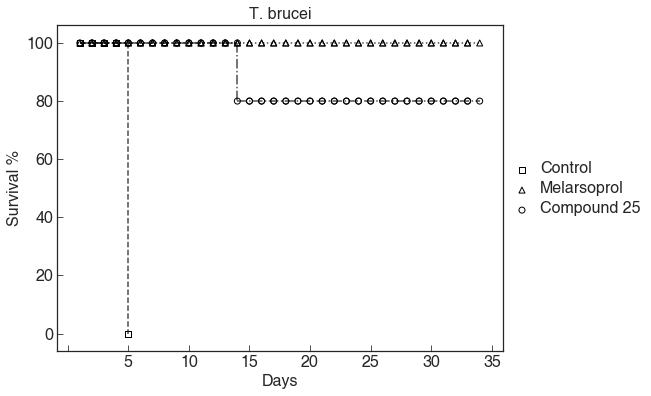

In [218]:
#we want to plot each day point
def expand_table(in_table):
    max_days = in_table['T'].max()
    samples = {}
    print (max_days)
    days = np.arange(1,max_days+1,1)
    for sample in in_table.index.values:
        temp_sample = in_table.loc[sample]
        obs = temp_sample['T']
        points = []
        for item in range(1,max_days+1):
            if item <= obs:
                points.append(1)
            else:
                points.append(0)
        samples[sample]=points
    return samples,days

       
samples, days=expand_table(tbb_table)   
samples = pd.DataFrame.from_dict(samples,orient='index')
samples.columns = ['D'+str(n) for n in days]
samples['group']=tbb_table['g'].values
samples = samples.groupby('group').sum()/samples.groupby('group').sum().max()*100
samples.head(15)

fig,ax =plt.subplots(figsize=(8,6))
ax.tick_params(direction="in")

ax.scatter(x=np.arange(1,samples.shape[1]+1,1)[0:5],
           y=samples.loc['control'].values[0:5], 
           facecolors='none', edgecolors='k', marker=',',
          label = 'Control')

ax.scatter(x=[5],
           y=[0], 
           facecolors='none', edgecolors='k', marker=',' )

ax.plot([1,5],[100,100],alpha=0.7, **{'color': 'k', 'linestyle': '--'})
ax.plot([5,5],[100,0],alpha=0.7,**{'color': 'k', 'linestyle': '--'})
#ax.plot([5,34],[0,0],alpha=0.7,**{'color': 'k', 'linestyle': '--'})


ax.scatter(x=np.arange(1,samples.shape[1]+1,1),
           y=samples.loc['melarsoprol'].values, 
           facecolors='none', edgecolors='k', marker='^',
          label = 'Melarsoprol')
ax.scatter(x=np.arange(1,samples.shape[1]+1,1)+1,
           y=samples.loc['melarsoprol'].values, 
           facecolors='none', edgecolors='k', marker='^' )

ax.plot([1,34],[100,100],alpha=0.7, **{'color': 'k', 'linestyle': ':'})

ax.scatter(x=np.arange(1,samples.shape[1]+1,1),
           y=samples.loc['compound25'].values, 
           facecolors='none', edgecolors='k', marker='o',
          label = 'Compound 25')
ax.scatter(x=np.arange(1,samples.shape[1]+1,1)+1,
           y=samples.loc['compound25'].values, 
           facecolors='none', edgecolors='k', marker='o',
          )


ax.plot([1,14],[100,100],alpha=0.7, **{'color': 'k', 'linestyle': '-.'})
ax.plot([14,14],[100,80],alpha=0.7, **{'color': 'k', 'linestyle': '-.'})
ax.plot([14,34],[80,80],alpha=0.7, **{'color': 'k', 'linestyle': '-.'})


ax.set_yticklabels(['', '0','20','40','60','80','100'],**hfont)
ax.set_xticklabels(['', '', '5','10','15','20','25','30','35'],**hfont)


plt.xlabel('Days',**hfont)
plt.ylabel('Survival %',**hfont)

L = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(L.texts, **hfont)
plt.title("T. brucei",**hfont)

plt.savefig('tb_bw.svg')
plt.savefig('tb_bw.pdf')
plt.show()


33


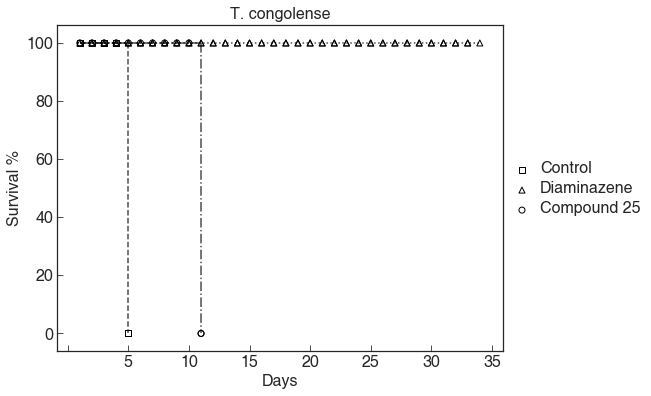

In [219]:
tcc_table = pd.read_table('Tc.txt')
samples, days=expand_table(tcc_table)   
samples = pd.DataFrame.from_dict(samples,orient='index')
samples.columns = ['D'+str(n) for n in days]
samples['group']=tbb_table['g'].values
samples = samples.groupby('group').sum()/samples.groupby('group').sum().max()*100
#samples.head(15)

fig,ax =plt.subplots(figsize=(8,6))
ax.tick_params(direction="in")

ax.scatter(x=np.arange(1,samples.shape[1]+1,1)[0:5],
           y=samples.loc['control'].values[0:5], 
           facecolors='none', edgecolors='k', marker=',',
          label = 'Control')
ax.scatter(x=[5],
           y=[0], 
           facecolors='none', edgecolors='k', marker=',' )

ax.plot([1,5],[100,100],alpha=0.7, **{'color': 'k', 'linestyle': '--'})
ax.plot([5,5],[100,0],alpha=0.7,**{'color': 'k', 'linestyle': '--'})
#ax.plot([5,34],[0,0],alpha=0.7,**{'color': 'k', 'linestyle': '--'})


ax.scatter(x=np.arange(1,samples.shape[1]+1,1),
           y=samples.loc['melarsoprol'].values, 
           facecolors='none', edgecolors='k', marker='^',
          label = 'Diaminazene')
ax.scatter(x=np.arange(1,samples.shape[1]+1,1)+1,
           y=samples.loc['melarsoprol'].values, 
           facecolors='none', edgecolors='k', marker='^' )

ax.plot([1,34],[100,100],alpha=0.7, **{'color': 'k', 'linestyle': ':'})


ax.scatter(x=np.arange(1,samples.shape[1]+1,1)[0:11],
           y=samples.loc['compound25'].values[0:11], 
           facecolors='none', edgecolors='k', marker='o',
          label = 'Compound 25')
ax.scatter(x=[11],
           y=[0], 
           facecolors='none', edgecolors='k', marker='o',
          )

ax.plot([1,11],[100,100],alpha=0.7, **{'color': 'k', 'linestyle': '-.'})
ax.plot([11,11],[100,0],alpha=0.7, **{'color': 'k', 'linestyle': '-.'})
#ax.plot([11,34],[0,0],alpha=0.7, **{'color': 'k', 'linestyle': '-.'})

ax.set_yticklabels(['', '0','20','40','60','80','100'],**hfont)
ax.set_xticklabels(['', '', '5','10','15','20','25','30','35'],**hfont)


plt.xlabel('Days',**hfont)
plt.ylabel('Survival %',**hfont)

L = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(L.texts, **hfont)
plt.title("T. congolense",**hfont)

plt.savefig('tc_bw.svg')
plt.savefig('tc_bw.pdf')
plt.show()



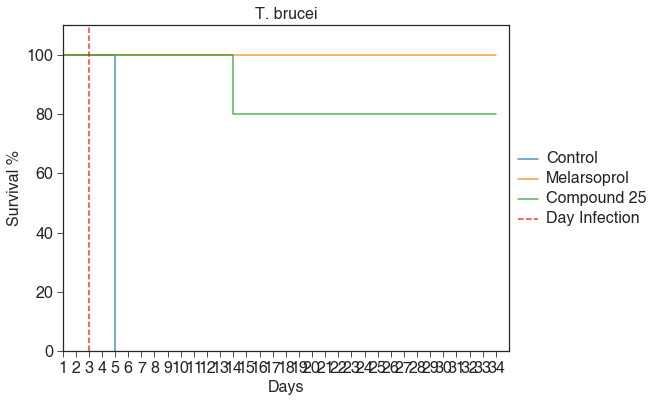

In [220]:
hfont = {'fontname':'Helvetica',
         'fontsize':16}
#the actual plot
fig,ax = plt.subplots(figsize=(8,6))
kmf = KaplanMeierFitter()

kmf.fit(control['T'].values,
        control['E'].values,
        label='Control',
        )

kmf.plot(ax=ax,
         ci_show=False,
         alpha=0.8,
         show_censors=False)

kmf.fit(melarsoprol['T'].values,
        melarsoprol['E'].values,
        label='Melarsoprol'
        )
kmf.plot(ax=ax,
         ci_show=False,
         alpha=0.8,
         show_censors=False)

kmf.fit(compound25['T'].values,
        compound25['E'].values,
        label='Compound 25'
       )
kmf.plot(ax=ax,
         ci_show=False,
         alpha=0.8,
         show_censors=False)

sns.set_style("ticks")
#sns.despine(offset=5, trim=True)
ax.axvline(2,c='r',ls='--',alpha=0.8, label='Day Infection')

ax.set_yticklabels(['0','20','40','60','80','100'],**hfont)
ax.set_xticks(np.arange(0,34,1))
ax.set_xticklabels(np.arange(1,35,1),**hfont)
#ax.grid()
L = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.setp(L.texts, **hfont)
#plt.yticklabels()
plt.ylim(-0,1.1)
plt.xlim(0,34)
plt.xlabel('Days',**hfont)
plt.ylabel('Survival %',**hfont)

plt.title("T. brucei",**hfont)
plt.savefig('tb.svg')
plt.savefig('tb.pdf')
plt.show()
#kmf.event_table

#bold helvetica
#size 16/18

### Stats time

In [51]:
#significance between the control and Melarsoprol
results = logrank_test(control['T'],
                       melarsoprol['T'],
                       control['E'],
                       melarsoprol['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [52]:
#significance between the control and Compound 25
results = logrank_test(control['T'],
                       compound25['T'],
                       control['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [53]:
#sanity check, significance between the Melarsoprol and Compound 25
results = logrank_test(melarsoprol['T'],
                       compound25['T'],
                       melarsoprol['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        1.0000 0.3173
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


### Import the data for T. congolense

In [7]:
#visualise t. congolense
tbb_table = pd.read_table('Tc.txt')
tbb_table.head()

control = tbb_table[tbb_table['g']=='control']
melarsoprol = tbb_table[tbb_table['g']=='melarsoprol']
compound25 = tbb_table[tbb_table['g']=='compound25']

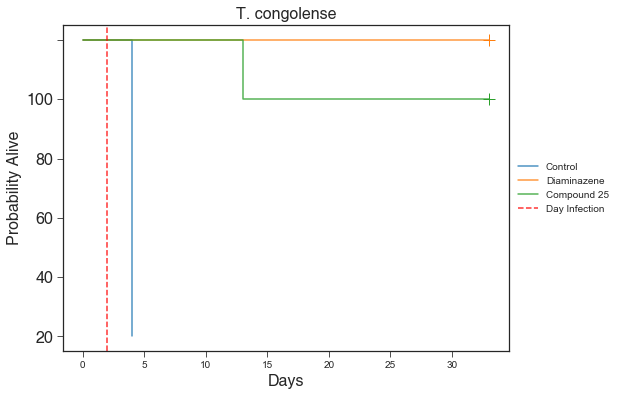

In [225]:
#the actual plot
fig,ax = plt.subplots(figsize=(8,6))
kmf = KaplanMeierFitter()

kmf.fit(control['T'].values,
        control['E'].values,
        label='Control',
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)



kmf.fit(melarsoprol['T'].values,
        melarsoprol['E'].values,
        label='Diaminazene'
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)

kmf.fit(compound25['T'].values,
        compound25['E'].values,
        label='Compound 25'
       )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)

ax.set_yticklabels(['0','20','40','60','80','100'],**hfont)
#ax.set_xticks(np.arange(0,34,1))
#ax.set_xticklabels(np.arange(1,35,1),**hfont)


#sns.set_style("ticks")
#sns.despine(offset=10, trim=True)
ax.axvline(2,c='r',ls='--',alpha=0.8,label='Day Infection')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Days',**hfont)
plt.ylabel('Probability Alive',**hfont)
plt.title("T. congolense",**hfont)
plt.savefig('tc.svg')
plt.savefig('tc.pdf')
plt.show()
#kmf.event_table

In [9]:
#significance between the control and Melarsoprol
results = logrank_test(control['T'],
                       melarsoprol['T'],
                       control['E'],
                       melarsoprol['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [10]:
#significance between the control and Compound 25
results = logrank_test(control['T'],
                       compound25['T'],
                       control['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [11]:
#significance between the Melarsoprol and Compound 25
results = logrank_test(melarsoprol['T'],
                       compound25['T'],
                       melarsoprol['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        9.0000 0.0027  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
